#### Question 2

In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


(a)

In [2]:
def process(T,q,alpha):
#N is the total number of state estimates, including initial condition x0
    x=zeros(T+1)
    d0=1
    d=np.random.normal(0,q,T+1)
    x0=np.random.standard_normal()
    x[0]=x0
    for t in range(1,T+1):
        x[t]=alpha*x[t-1]+d[t]
    return x

def Hfun(T,T1,T2):
    h=np.zeros(T+1)
    for i in range(0,T+1):
        if i in range(0,T1+1):
            h[i]=1
        if i in range(T1+1,T2+1):
            h[i]=0.1
        if i in range(T2+1,T+1):
            h[i]=1
    return h


def data(x,r,T,T1,T2):
    h=Hfun(T,T1,T2)
    eps=np.random.normal(0,r,T+1)
    y=zeros(T+1)
    y=h*x+eps
   
    return y

In [3]:

alpha=0.8
q=0.4
r=0.1
T=30
T1=10
T2=20

x=process(T,q,alpha)
y=data(x,r,T,T1,T2)

<IPython.core.display.Javascript object>


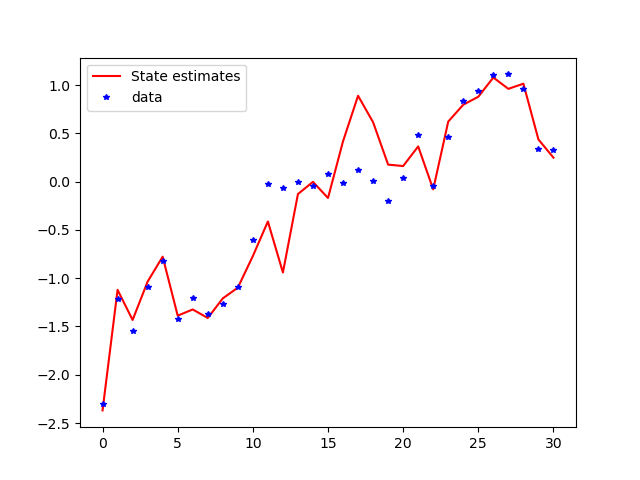

In [4]:



figure(1)
clf()
plot(x,'r-',markersize=4,label='State estimates')
plot(y,'b*',markersize=4,label='data')
show()
legend()

As values of h_i varies the two data and state estimate patterns alo vary. The state estimates tend to follow similar pattern as the data in the first range of values of i i.e between 0 and T1 and also the third range i.e between T2 and T. However, the state estimates deviate from the data in the secon range of values of i i.e between T1+1 and T2.

(b)

In [5]:
def Kalman(alpha,q,r,T):
    mu_old=np.zeros(T+1)
    mu_new=np.zeros(T+1)
    sigma_old=np.zeros(T+1)
    sigma_new=np.zeros(T+1)
    mu_old[0]=0
    mu_new[0]=0
    sigma_old[0]=1
    sigma_new[0]=1
    
    
    for t in range(1,T+1):
        mu_old[t]=alpha*mu_new[t-1]
        
        sigma_old[t]=q**2+alpha**2*sigma_new[t-1]
        k=sigma_old[t]*(sigma_old[t]+r**2)**-1
        mu_new[t]=mu_old[t]+k*(y[t]-mu_old[t])
        sigma_new[t]=(1-k)*sigma_old[t]
    return  mu_old,mu_new, sigma_old,sigma_new

In [6]:

alpha=0.8
q=0.4
r=0.1
T=30
filtered,forecasted,sigma_fitered, sigma_forecasted=Kalman(alpha,q,r,T)

In [7]:
filtered=filtered[1:]
forecasted=forecasted[1:]
sigma_fitered=np.sqrt(sigma_fitered[1:])
sigma_forecasted=np.sqrt(sigma_forecasted[1:])

<IPython.core.display.Javascript object>


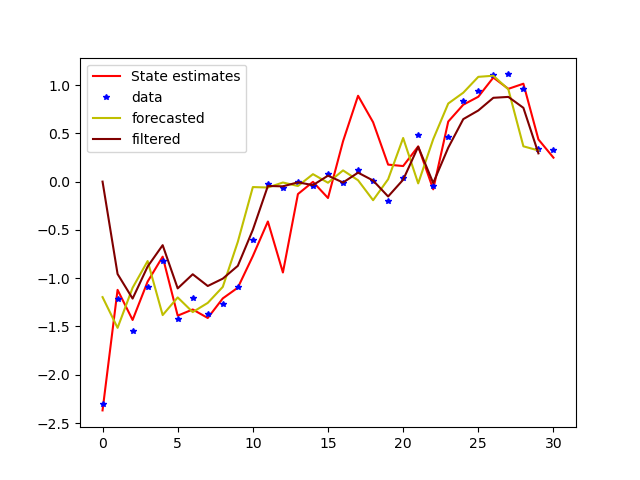

In [8]:


figure(2)
clf()
plot(x,'r-',markersize=4,label='State estimates')
plot(y,'b*',markersize=4,label='data')
plot(forecasted,'y-',markersize=4,label='forecasted')
plot(filtered,'maroon',markersize=4,label='filtered')

show()
legend()

From fgure 2 above, we can see that the data and state estimates have the same behaviour as described in (a) above. The filtered and the forecasted estimates also follow the same path as the data all through the time periods. But we can observe that the filtered estimates tend to be more close to the data than the forecasted ones.

(c)

In [9]:
#for the forecasted

mu_sigmafore=forecasted-sigma_forecasted
muplussigfore=forecasted+sigma_forecasted

#for the filtered

mu_sigmafil=filtered-sigma_fitered
muplussigmafil=filtered+sigma_fitered


<IPython.core.display.Javascript object>


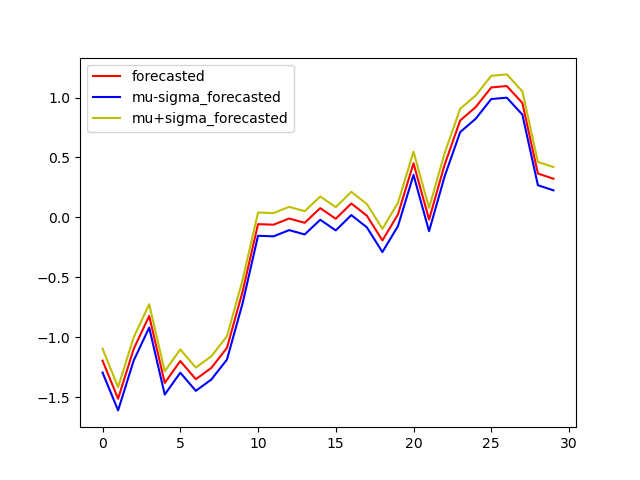

In [10]:
#for the forecasted
figure(3)
clf()
plot(forecasted,'r-',markersize=4,label='forecasted')
plot(mu_sigmafore,'b-',markersize=4,label='mu-sigma_forecasted')
plot(muplussigfore,'y-',markersize=4,label='mu+sigma_forecasted')

show()
legend()

Figure 3 shows the three curves,mu,mu-sigma and mu+sigma for the forecasted estimates. We can see that the forcasted values are between the lower and upper bounds.

<IPython.core.display.Javascript object>


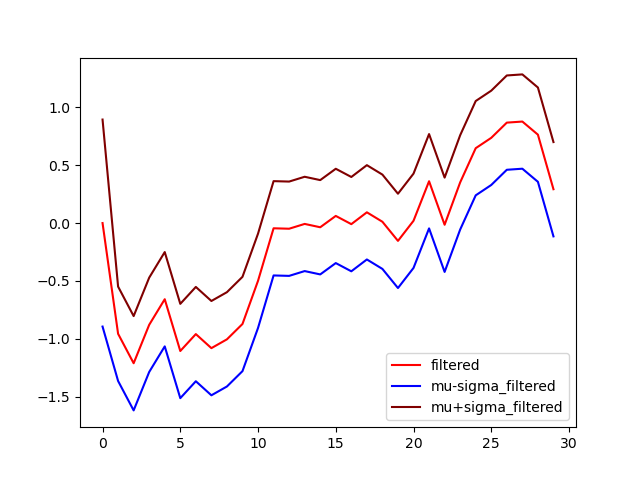

In [11]:
#for the filtered
figure(4)
clf()
plot(filtered,'r-',markersize=4,label='filtered')
plot(mu_sigmafil,'b-',markersize=4,label='mu-sigma_filtered')
plot(muplussigmafil,'maroon',markersize=4,label='mu+sigma_filtered')

show()
legend()

Figure 4 shows the three curves,mu,mu-sigma and mu+sigma for the filtered estimates. We can see that the filtered values are between the lower and upper bounds.

#### Question 3

(a)

In [12]:
def process1(T,q1,alpha1):
#N is the total number of state estimates, including initial condition x0
    x1=zeros(T+1)
    d1=np.random.normal(0,q1,T+1)
    x10=np.random.normal(0.1,0.01)
    x1[0]=x10
    for t in range(1,T+1):
        x1[t]=alpha1*x1[t-1]*(1-x1[t-1])+d1[t]
    return x1


def data1(x1,r1,T):
    eps1=np.random.normal(0,r1,T+1)
    y1=zeros(T+1)
    y1=x1+eps1
   
    return y1

In [13]:

alpha1=0.9
q1=0.001
r1=0.005
T=30


x1=process1(T,q1,alpha1)
y1=data1(x1,r1,T)

<IPython.core.display.Javascript object>


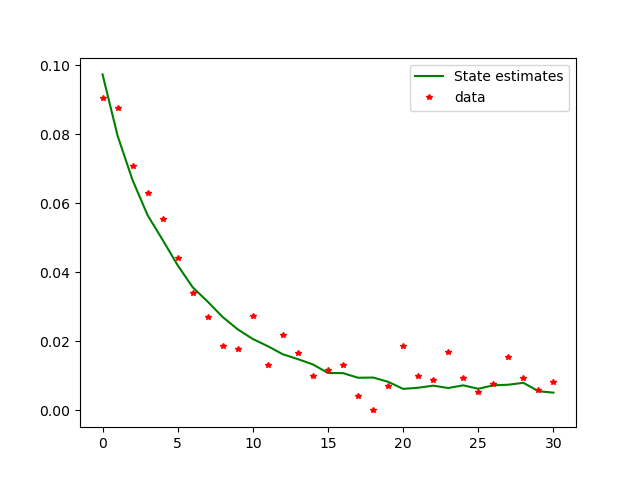

In [14]:

figure(5)
clf()
plot(x1,'g',markersize=4,label='State estimates')
plot(y1,'r*',markersize=4,label='data')
show()
legend()

(b)

In [15]:
def Mfun(x1,alpha1,T):
    M=zeros(T+1)
    for t in range(1,T+1):
        
        M[t]=alpha1-2*alpha1*x1[t-1]
        
    return M
M=Mfun(x1,alpha1,T)


In [16]:
def Ext_Kalman(T,y1,x1,alpha1,M):
    mu_old1=zeros(T+1)
    mu_new1=zeros(T+1)
    sigma_old1=zeros(T+1)
    sigma_new1=zeros(T+1)
    mu_old1[0]=0
    mu_new1[0]=0.1
    sigma_old1[0]=0.0001
    sigma_new1[0]=0.0001
    for t in range(1,T+1):
        mu_old1[t]=alpha1*mu_new1[t-1]*(1-mu_new1[t-1])
        
        sigma_old1[t]=q1**2+M[t]**2*sigma_new1[t-1]
        
        k1=sigma_old1[t]*(sigma_old1[t]+r1**2)**(-1)
        
        mu_new1[t]=mu_old1[t]+k1*(y1[t]-mu_old1[t])
        
        sigma_new1[t]=(1-k1)*sigma_old1[t]

    return mu_old1,mu_new1,sigma_old1,sigma_new1

<IPython.core.display.Javascript object>


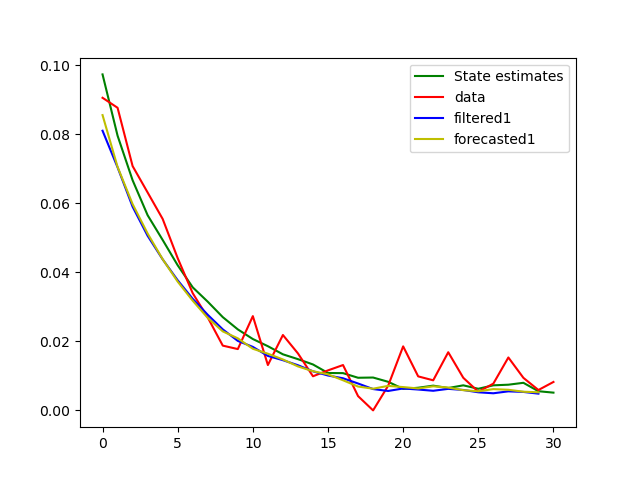

In [17]:
filtered1,forecasted1,sigma_filtered1,sigma_forecasted1=Ext_Kalman(T,y1,x1,alpha1,M)
filtered1=filtered1[1:]
forecasted1=forecasted1[1:]
sigma_filtered1=sigma_filtered1[1:]
sigma_forecasted1=sigma_forecasted1[1:]






figure(6)
clf()
plot(x1,'g',markersize=4,label='State estimates')
plot(y1,'r',markersize=4,label='data')
plot(filtered1,'b',markersize=4,label='filtered1')
plot(forecasted1,'y',markersize=4,label='forecasted1')

show()
legend()

In [18]:
#for the forecasted

mu_sigmafore1=forecasted1-sigma_forecasted1
muplussigfore1=forecasted1+sigma_forecasted1

#for the filtered

mu_sigmafil1=filtered1-sigma_filtered1
muplussigmafil1=filtered1+sigma_filtered1

<IPython.core.display.Javascript object>


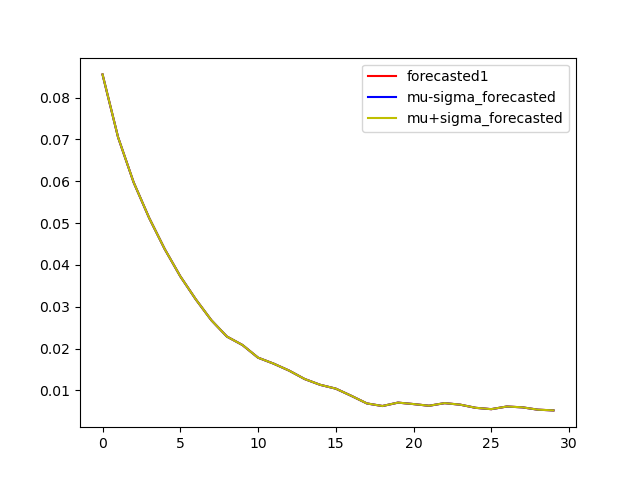

In [19]:
#for the forecasted
figure(7)
clf()
plot(forecasted1,'r-',markersize=4,label='forecasted1')
plot(mu_sigmafore1,'b-',markersize=4,label='mu-sigma_forecasted')
plot(muplussigfore1,'y-',markersize=4,label='mu+sigma_forecasted')

show()
legend()

<IPython.core.display.Javascript object>


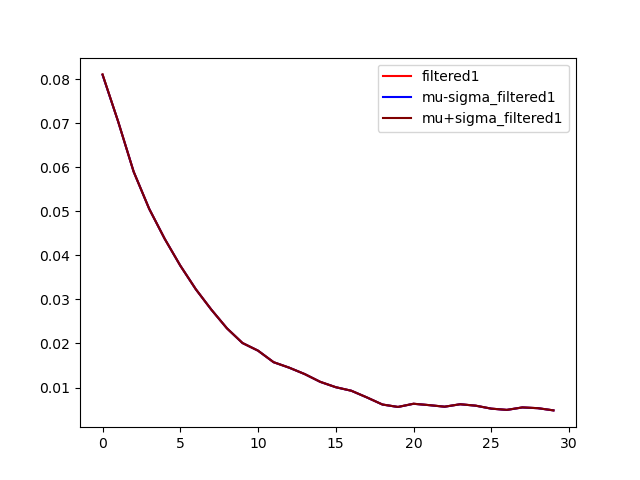

In [20]:
#for the filtered
figure(8)
clf()
plot(filtered1,'r-',markersize=4,label='filtered1')
plot(mu_sigmafil1,'b-',markersize=4,label='mu-sigma_filtered1')
plot(muplussigmafil1,'maroon',markersize=4,label='mu+sigma_filtered1')

show()
legend()